In [ ]:
!unzip /content/drive/MyDrive/Stroke_Prediction.zip

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten , Dropout 
from tensorflow.keras.models import Model
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/chest_xray/train/*')
print(len(folders))

2


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [ ]:

x = Flatten()(vgg.output)




In [ ]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()]
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[early_stop]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
163/163 [==============================] - 99s 604ms/step - loss: 0.2840 - accuracy: 0.8805 - recall_14: 0.9325 - precision_13: 0.9099 - val_loss: 0.2545 - val_accuracy: 0.8990 - val_recall_14: 0.9538 - val_precision_13: 0.8921
Epoch 2/100
163/163 [==============================] - 98s 601ms/step - loss: 0.1166 - accuracy: 0.9573 - recall_14: 0.9688 - precision_13: 0.9731 - val_loss: 0.3655 - val_accuracy: 0.8878 - val_recall_14: 0.9923 - val_precision_13: 0.8524
Epoch 3/100
163/163 [==============================] - 98s 600ms/step - loss: 0.0917 - accuracy: 0.9686 - recall_14: 0.9800 - precision_13: 0.9777 - val_loss: 0.2481 - val_accuracy: 0.9151 - val_recall_14: 0.9795 - val_precision_13: 0.8946
Epoch 4/100
163/163 [==============================] - 98s 598ms/step - loss: 0.0883 - accuracy: 0.9652 - recall_14: 0.9729 - precision_13: 0.9799 - val_loss: 0.2254 - val_accuracy: 0.9199 - val_recall_14: 0.9487 - val_precision_13: 0.9250
Epoch 5/100
163/163 [===================

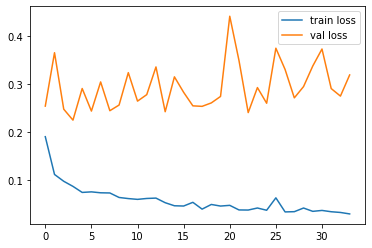

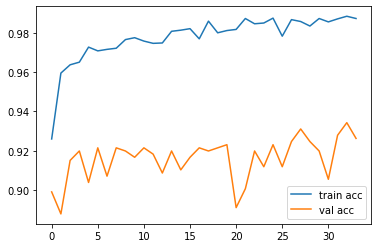

0.9160539209842682


<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Lung_LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Lung_AccVal_acc')

print(np.mean(r.history['val_accuracy']))

